# Assignment 1: Pranoramic Image Stitching

## Part 1: 2D Convolution

In [7]:
import cv2 
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

In [8]:
def plot_image(img: np.array):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray');
    
def plot_two_images(img1: np.array, img2: np.array):
    _, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(img1, cmap='gray')
    ax[1].imshow(img2, cmap='gray');
    

In [76]:
def conv2d(img: np.array, kernel: np.array) -> np.array:
    """
    Take a 2D image and a given kernel, perform convolution operation.
    Args:
        img (np.array): input image
        kernel (np.array): convolution kernel
    Returns:
        np.array: the output image
    """

    # Calculate the output image shape (assuming 0 padding, stride 1)
    w_k = kernel.shape[0]
    h_k = kernel.shape[1]
    w_out = np.floor((img.shape[0] - w_k)).astype(int) + 1
    h_out = np.floor((img.shape[1] - h_k)).astype(int) + 1
    # Create a output image filled by zeros
    img_out = np.zeros(shape=(w_out, h_out))
    
    # Perform convolution
    for i in range(w_out):
        for j in range(h_out):
            mat = img[i:i+w_k, j:j+h_k]
            img_out[i, j] = np.sum(np.multiply(mat, kernel))
            
    return img_out

# Define some kernels
sobel_x = np.array([
    [ 1,  0, -1],
    [ 2,  0, -2],
    [ 1,  0, -1]
])
sobel_y = np.array([
    [ 1,  2,  1],
    [ 0,  0,  0],
    [-1, -2, -1]
])
gaussian_3_3 = np.array([
    [ 0, -1,  0],
    [-1,  4, -1],
    [ 0, -1,  0]
])
gaussian_5_5 = np.array([
    [ 0,  0, -1,  0,  0],
    [ 0, -1, -2, -1,  0],
    [-1, -2, 16, -2, -1],
    [ 0, -1, -2, -1,  0],
    [ 0,  0, -1,  0,  0]
])

def haar_kernel(width: int = 3, height: int = 3, style: str = 'diag', flip: bool = False) -> np.array:
    """
    Take a 2D image and a given kernel, perform convolution operation.
    Args:
        width (int): width of the kernel
        height (int): height of the kernel
        style (str): style of the kernel, 'edge', 'line', or 'diag'
        flip (bool): whether to flip the color of the kernel (by default, the top left corner is white)
    Returns:
        np.array: the output kernel
    """
    # Create a output kernel filled by zeros
#     img_out = np.zeros(shape=(w_out, h_out))
    
#     if style is 'edge':
        


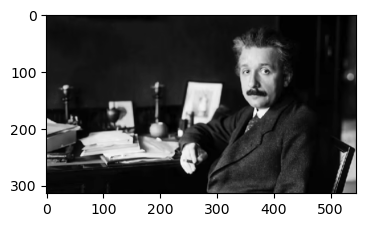

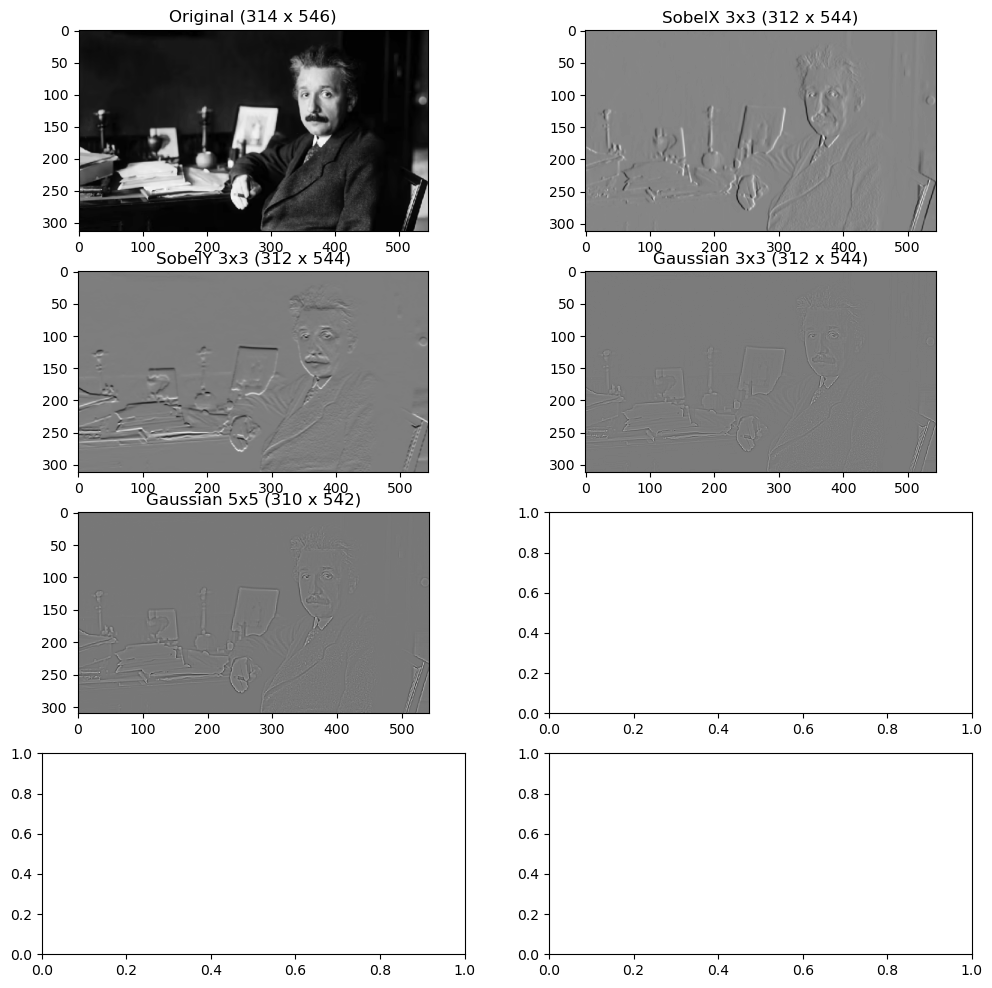

In [75]:
# Read the input image as a grayscale image
img = Image.open('images/einstein.png')
img = ImageOps.grayscale(img)

# Apply kernels to the input image
_, ax = plt.subplots(5, 2, figsize=(12, 12))
ax[0][0].imshow(np.array(img), cmap='gray')
ax[0][0].title.set_text('Original (%d x %d)' %(np.array(img).shape[0], np.array(img).shape[1]))

# Sobel
img_sobel_x = conv2d(img=np.array(img), kernel=sobel_x)
ax[0][1].imshow(img_sobel_x, cmap='gray')
ax[0][1].title.set_text('SobelX 3x3 (%d x %d)' %(img_sobel_x.shape[0], img_sobel_x.shape[1]))
img_sobel_y = conv2d(img=np.array(img), kernel=sobel_y)
ax[1][0].imshow(img_sobel_y, cmap='gray')
ax[1][0].title.set_text('SobelY 3x3 (%d x %d)' %(img_sobel_y.shape[0], img_sobel_y.shape[1]))

# Gaussian
img_gauss_3 = conv2d(img=np.array(img), kernel=gaussian_3_3)
ax[1][1].imshow(img_gauss_3, cmap='gray')
ax[1][1].title.set_text('Gaussian 3x3 (%d x %d)' %(img_gauss_3.shape[0], img_gauss_3.shape[1]))
img_gauss_5 = conv2d(img=np.array(img), kernel=gaussian_5_5)
ax[2][0].imshow(img_gauss_5, cmap='gray')
ax[2][0].title.set_text('Gaussian 5x5 (%d x %d)' %(img_gauss_5.shape[0], img_gauss_5.shape[1]))

# Haar-like
# img_gauss_3 = conv2d(img=np.array(img), kernel=gaussian_3_3)
# ax[2][1].imshow(conv2d(img=np.array(img), kernel=gaussian_3_3), cmap='gray')
# ax[2][1].title.set_text('Gaussian 3x3')
# ax[1][1].imshow(conv2d(img=np.array(img), kernel=gaussian_5_5), cmap='gray')
# ax[1][1].title.set_text('Gaussian 5x5')

## Part 2: SIFT Features and Descriptors